In [1]:
import detection as dect
import plane_fitting as plane
import transformation as trans
import argparse
import detection_yolo as yolo
import line_fitting as line

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
depth = np.load('drone_img/depth/depth_camera_image0.npy')

In [4]:
rgb = cv2.imread('drone_img/rgb/rgb_camera_image1.jpeg')

In [5]:
img_mask = dect.color_threshold(rgb)
thresh, close, image, center = dect.final_detection(rgb.copy(), img_mask)

In [6]:
center

[[386, 121]]

In [7]:
center = np.array(center)

In [8]:
Fx = 1131.2017905548394
Fy = Fx
k = 10
center_depth = np.array(center*360/480, dtype = int)
data = depth[center_depth[0,1]-k:center_depth[0,1]+k +1,center_depth[0,0]-k:center_depth[0,0]+k+1]
A = np.arange((2*k)+1)
A = A-k
x = []
for i in range ((2*k)+1):
    x.append(A)
x = np.array(x)*(-1)
y = (x.T)
x = x/Fx
y = y/Fy
x = x*data
y = y*data

In [33]:
points = []
points_sense = []
points.append(x)
points.append(y)
points.append(data)
points = np.array(points)
points_sense.append(y)
points_sense.append(data)
points_sense = np.array(points_sense)
points_sense = np.array(points_sense[:,8:12,:], dtype= int)
points_sense = np.reshape(points_sense, (2, points_sense.shape[1]*points_sense.shape[2]))
pc = np.reshape(points, (3,((2*k)+1)**2))
pc = pc.T

In [34]:
points_sense.shape

(2, 84)

In [35]:
#points_sense = np.reshape(points_sense, (2, 4*21))


In [37]:
import line_fitting as line
import matplotlib.pyplot as plt
import numpy as np

In [38]:
n = 100
max_iterations = 100
goal_inliers = n * 0.3

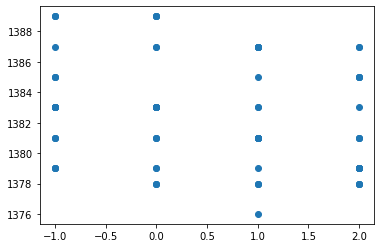

In [39]:
plt.scatter(points_sense[0], points_sense[1])

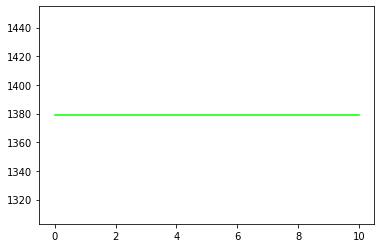

In [41]:
m, b = line.run_ransac(points_sense.T, line.estimate, lambda x, y: line.is_inlier(x, y, 0.01),2, goal_inliers, max_iterations)
a, b, c = m
plt.plot([0, 10], [-c/b, -(c+10*a)/b], color=(0, 1, 0))

plt.show()

In [46]:
c

0.9999997370692981